# Self-Organizing Map

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=fa92e5bcb08f26ab5979e0bc47f7732d1e4dc463cc71d30dc51cca31ad26db2e
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [2]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn import preprocessing

To visualize the result of the training we can plot the distance map (U-Matrix) using a pseudocolor where the neurons of the maps are displayed as an array of cells and the color represents the (weights) distance from the neighbour neurons. A scatter chart is used where each dot represents the coordinates of the winning neuron. A random offset is added to avoid overlaps between points within the same cell.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_scatter(data):
  data_norm = data
  data_norm = (data_norm-data_norm.min())/(data_norm.max()-data_norm.min())
  data_norm = np.reshape(data_norm.values, (-1, 1))
  som_shape = (2, 2)
  som = MiniSom(som_shape[0], som_shape[1], 1, sigma=.5, learning_rate=.3,
                neighborhood_function='gaussian', random_seed=10)

  som.train_batch(data_norm, 500, verbose=True)

  # each neuron represents a cluster
  winner_coordinates = np.array([som.winner(x) for x in data_norm]).T
  # with np.ravel_multi_index we convert the bidimensional
  # coordinates to a monodimensional index
  cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
  df_cluster_index = pd.DataFrame(cluster_index, columns=['Cluster'])
  w_x, w_y = zip(*[som.winner(d) for d in data_norm])
  w_x = np.array(w_x)
  w_y = np.array(w_y)

  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  label_names = {1:'Low', 0:'Medium', 2:'High', 3:'Very High'}
  colors = ['C0', 'C2', 'C1','C3']
  for c in np.unique(cluster_index):
      idx_target = cluster_index==c
      x = w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8
      y = w_y[idx_target]+.2+(np.random.rand(np.sum(idx_target))-.2)*.9
      plt.scatter(x, y, s=50, c=colors[c], label=label_names[c])
      pos_idx = 0
      for cur_idx, cur_point in enumerate(idx_target):
        if cur_point:
          # text = districts[cur_idx] + " ," + str(round(data[cur_idx], 1))
          text = districts[cur_idx]
          plt.annotate(text, (x[pos_idx], y[pos_idx]))
          pos_idx = pos_idx + 1
  
  handles, labels = plt.gca().get_legend_handles_labels()
  order = [1,0,2,3]
  plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right', bbox_to_anchor=(1.4, 1))
  
  # plt.legend(loc='upper right')
  plt.grid()
  plt.title(data.name)
  # plt.savefig('resulting_images/som_seed.png')
  plt.show()

  return df_cluster_index

## Cumulative Cases by Districts

In [5]:
df = pd.read_excel("/content/COVIDBuildingData.xlsx", sheet_name="Sheet3",skiprows=1)
df = df.fillna(0)

In [6]:
districts = df.columns[1:-1]
districts

Index(['Central&Western', 'Eastern', 'Island', 'KowloonCity', 'KwaiTsing',
       'KwunTong', 'North', 'SaiKung', 'ShamShuiPo', 'ShaTin', 'Southern',
       'TaiPo', 'TsuenWan', 'TuenMun', 'WanChai', 'WongTaiSin', 'YauTsimMong',
       'YuenLong'],
      dtype='object')

In [7]:
df_first_wave = df[0:2] # 202001-202002
df_second_wave = df[2:4] # 202003-202004
df_third_wave = df[6:9] # 202007-202009
df_fourth_wave = df[10:17] # 202011-202105
df_fifth_wave = df[23:33] # 202112-202209

df_first1 = df[0:1] # 202001
df_second1 = df[1:2] # 202002
df_first2 = df[2:3] # 202003
df_second2 = df[3:4] # 202004
df_first3 = df[6:7] # 202007
df_second3 = df[7:9] # 202008-202009
df_first4 = df[10:13] # 202011-202101
df_second4 = df[13:17] # 202102-202105
df_first5 = df[23:27] # 202112-202203
df_second5 = df[27:33] # 202204-202209

df_first_wave

,Row Labels,Central&Western,Eastern,Island,KowloonCity,KwaiTsing,KwunTong,North,SaiKung,ShamShuiPo,ShaTin,Southern,TaiPo,TsuenWan,TuenMun,WanChai,WongTaiSin,YauTsimMong,YuenLong,Grand Total
0,202001,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0.0,11
1,202002,7.0,33.0,1.0,4.0,6.0,16.0,1.0,4.0,4.0,3.0,4.0,2.0,0.0,6.0,21.0,4.0,6,2.0,124


In [8]:
df_first_wave = df_first_wave.iloc[:,1:19].sum(axis=0)
df_second_wave = df_second_wave.iloc[:,1:19].sum(axis=0)
df_third_wave = df_third_wave.iloc[:,1:19].sum(axis=0)
df_fourth_wave = df_fourth_wave.iloc[:,1:19].sum(axis=0)
df_fifth_wave = df_fifth_wave.iloc[:,1:19].sum(axis=0)

df_first1 = df_first1.iloc[:,1:19].sum(axis=0)
df_second1 = df_second1.iloc[:,1:19].sum(axis=0)
df_first2 = df_first2.iloc[:,1:19].sum(axis=0)
df_second2 = df_second2.iloc[:,1:19].sum(axis=0)
df_first3 = df_first3.iloc[:,1:19].sum(axis=0)
df_second3 = df_second3.iloc[:,1:19].sum(axis=0)
df_first4 = df_first4.iloc[:,1:19].sum(axis=0)
df_second4 = df_second4.iloc[:,1:19].sum(axis=0)
df_first5 = df_first5.iloc[:,1:19].sum(axis=0)
df_second5 = df_second5.iloc[:,1:19].sum(axis=0)

In [9]:
df_first_wave.name = "First Wave: 01/2020-02/2020"
df_second_wave.name = "Second Wave: 03/2020-04/2020"
df_third_wave.name = "Third Wave: 07/2020-09/2020"
df_fourth_wave.name = "Fourth Wave: 11/2020-05/2021"
df_fifth_wave.name = "Fifth Wave: 12/2021-09/2022"

df_first1.name = "The First Half of the 1st Wave: 01/2020"
df_second1.name = "The Second Half of the 1st Wave: 02/2020"
df_first2.name = "The First Half of the 2nd Wave: 03/2020"
df_second2.name = "The Second Half of the 2nd Wave: 04/2020"
df_first3.name = "The First Half of the 3rd Wave: 07/2020"
df_second3.name = "The Second Half of the 3rd Wave: 08/2020-09/2020"
df_first4.name = "The First Half of the 4th Wave: 11/2020-01/2021"
df_second4.name = "The Second Half of the 4th Wave: 02/2021-05/2021"
df_first5.name = "The First Half of the 5th Wave: 12/2021-03/2022"
df_second5.name = "The Second Half of the 5th Wave: 04/2022-09/2022"

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.03732711223759492


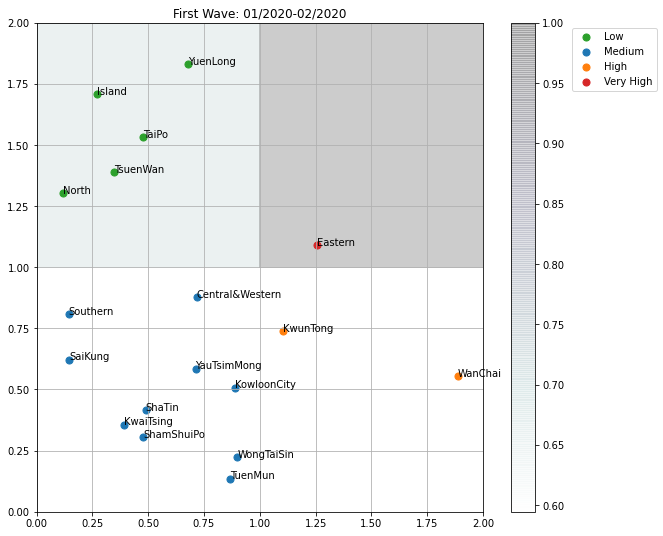

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.047981437974434424


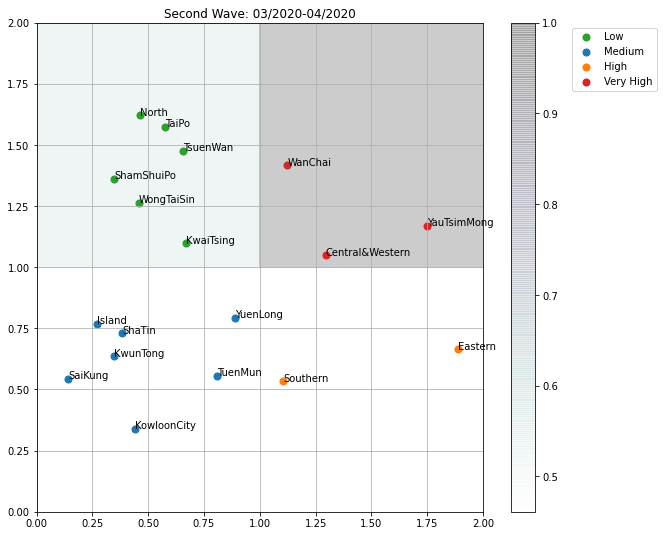

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05822652644640072


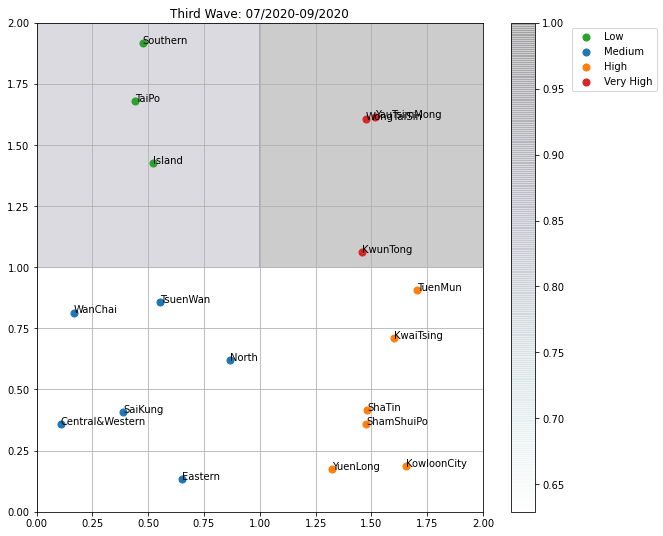

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.04703256931307162


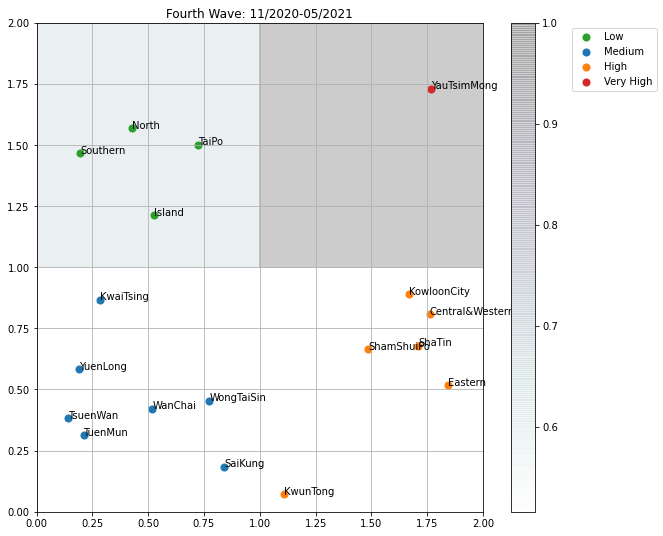

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05694422958280311


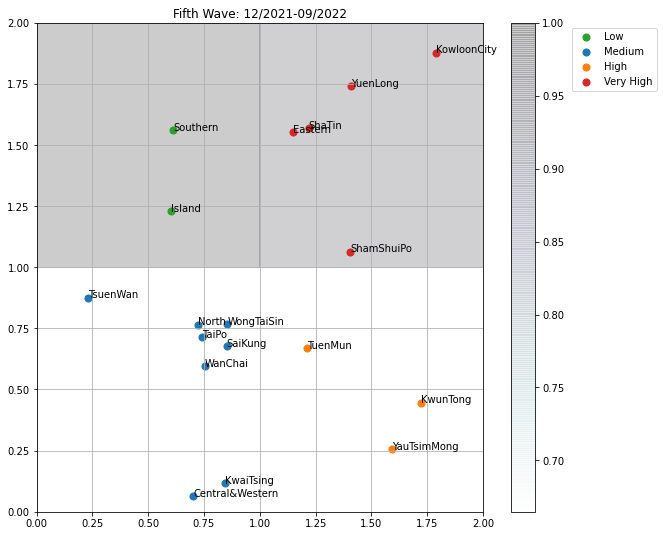

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05053192841650747


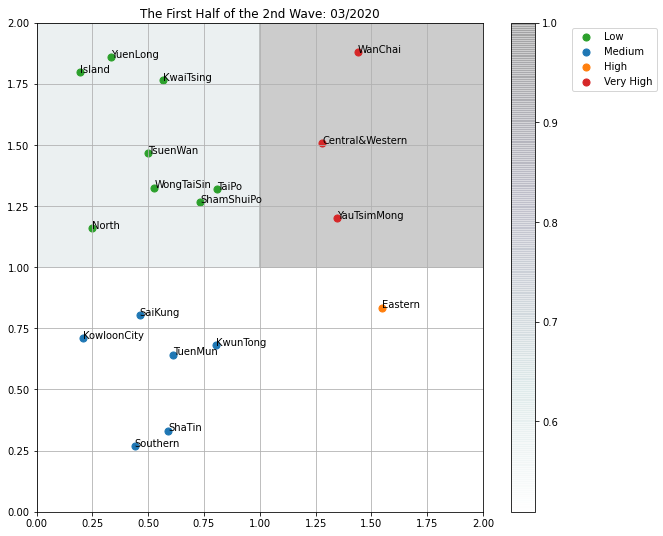

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.04294100704990094


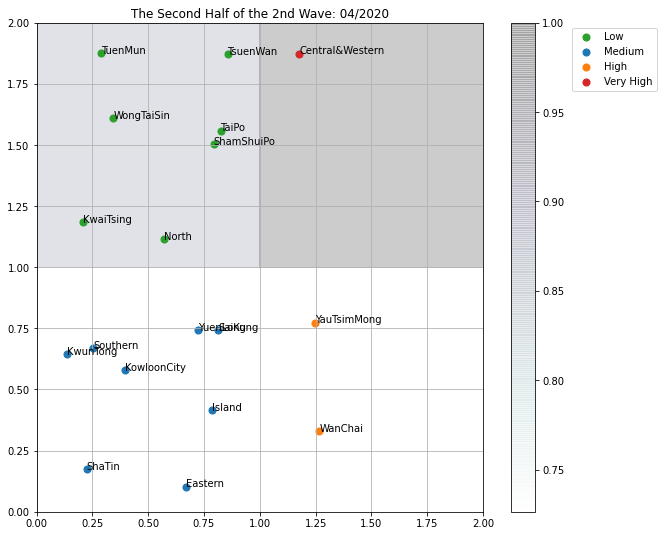

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05466547225178944


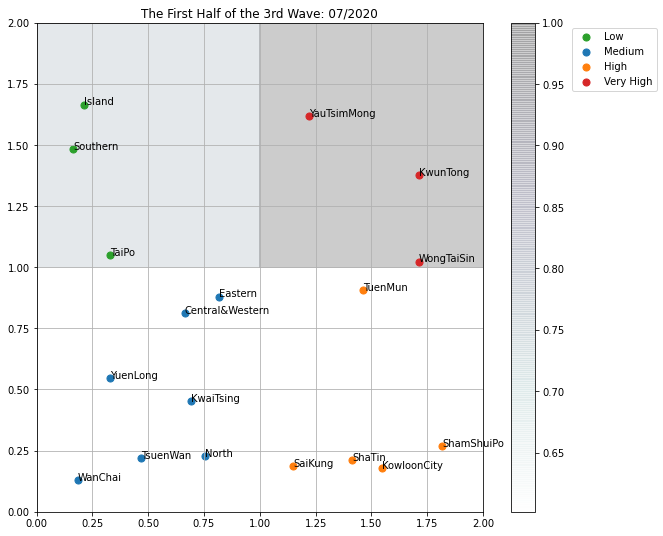

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.051017564583440284


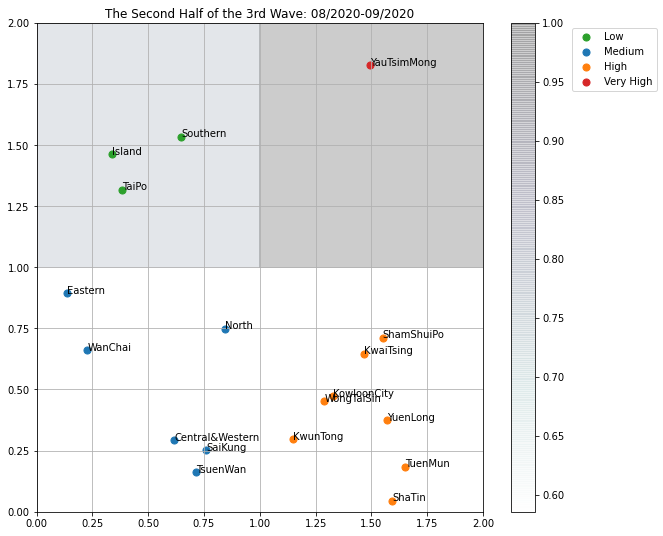

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.04540605705191853


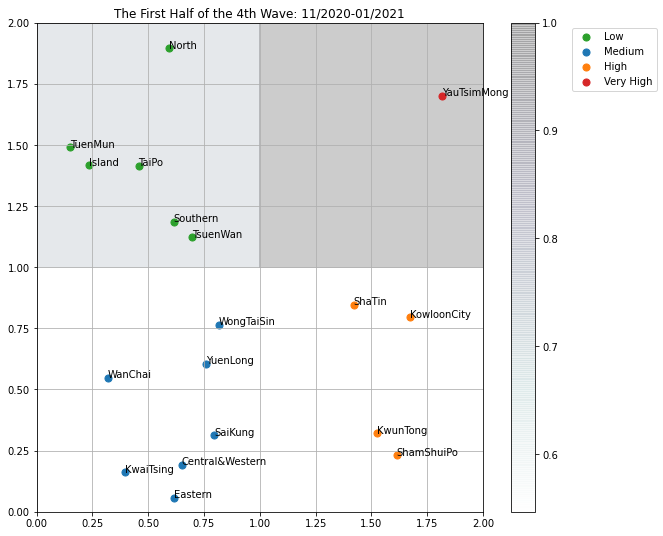

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.03927119464782128


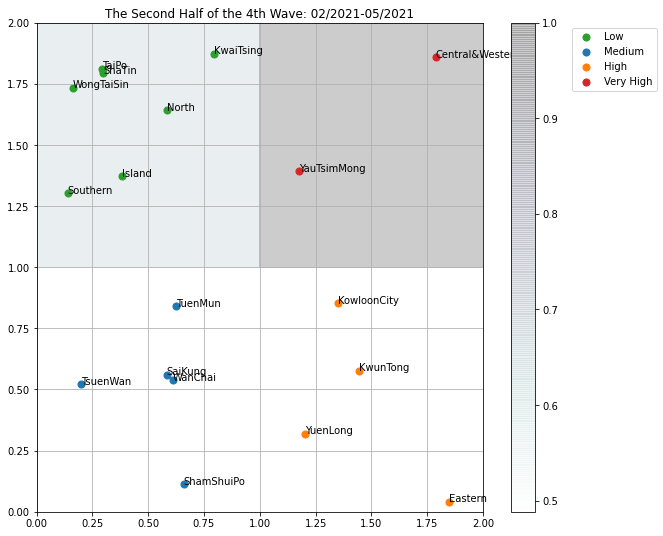

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.052868472392032295


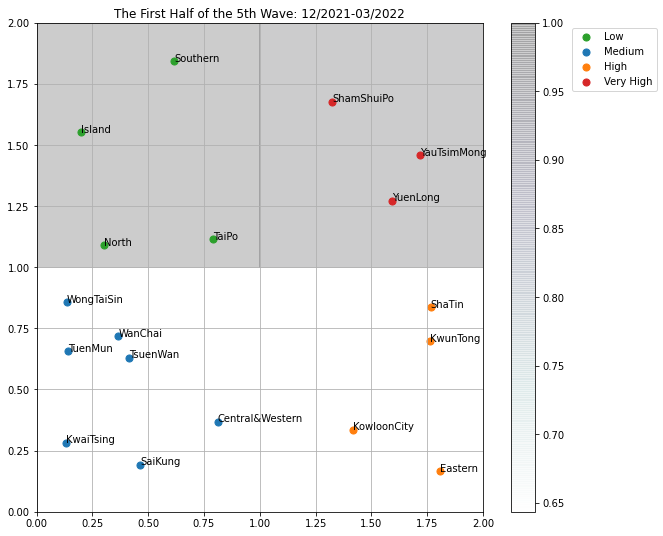

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.057696123103632736


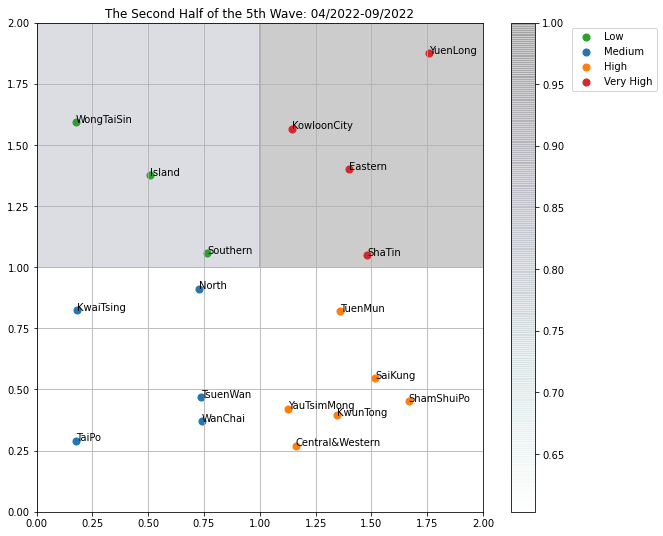

In [10]:
df_cluster = plot_scatter(df_first_wave)
df_cluster = df_cluster.rename(columns={'Cluster': 'First Wave'})
df_cluster['Second Wave'] = plot_scatter(df_second_wave)
df_cluster['Third Wave'] = plot_scatter(df_third_wave)
df_cluster['Fourth Wave'] = plot_scatter(df_fourth_wave)
df_cluster['Fifth Wave'] = plot_scatter(df_fifth_wave)

# df_cluster['First Half of 1st Wave']= plot_scatter(df_first1)
# df_cluster['Second Half of 1st Wave'] = plot_scatter(df_second1)
df_cluster['First Half of 2nd Wave']= plot_scatter(df_first2)
df_cluster['Second Half of 2nd Wave'] = plot_scatter(df_second2)
df_cluster['First Half of 3rd Wave']= plot_scatter(df_first3)
df_cluster['Second Half of 3rd Wave'] = plot_scatter(df_second3)
df_cluster['First Half of 4th Wave']= plot_scatter(df_first4)
df_cluster['Second Half of 4th Wave'] = plot_scatter(df_second4)
df_cluster['First Half of 5th Wave']= plot_scatter(df_first5)
df_cluster['Second Half of 5th Wave'] = plot_scatter(df_second5)

## Population Features

In [11]:
df_features = pd.read_excel("/content/population features.xlsx")
df_features = df_features.iloc[:,1:]
df_features

,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,38848,19391,39191,17316,13215,139534,44234,46951
1,92314,30861,111968,55530,14017,296373,82861,72988
2,24499,886,17377,16659,2330,79815,20154,18547
3,64148,41802,33712,64832,18372,217224,59976,51992
4,86787,22307,82825,62259,8842,259427,67123,32536
5,111259,57530,109342,70649,9218,315577,78973,44721
6,49274,2310,52922,24583,9324,150586,35594,22537
7,67866,3563,116589,25829,15353,245332,58140,59610
8,64473,43381,95294,23720,8252,205565,58104,36786
9,105219,9602,99553,90326,23206,335202,77666,76094


0
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.055129572901084695


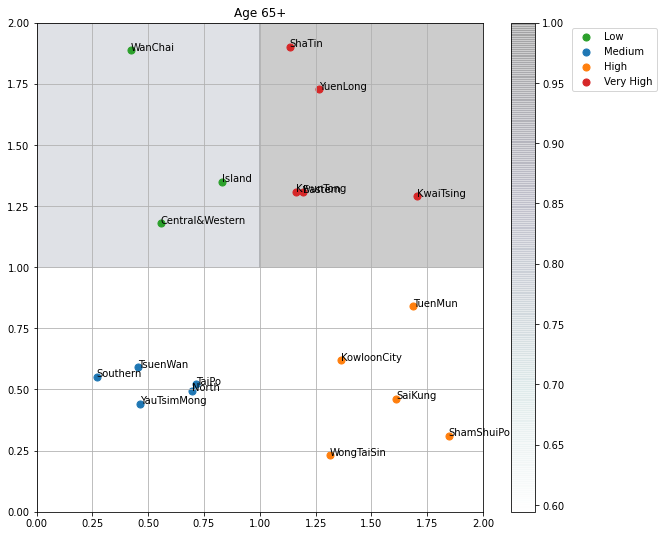

1
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05069355485365739


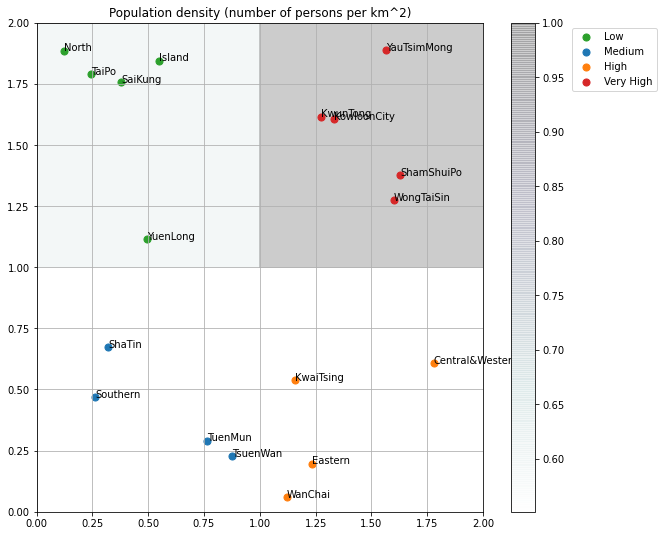

2
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05444882886006605


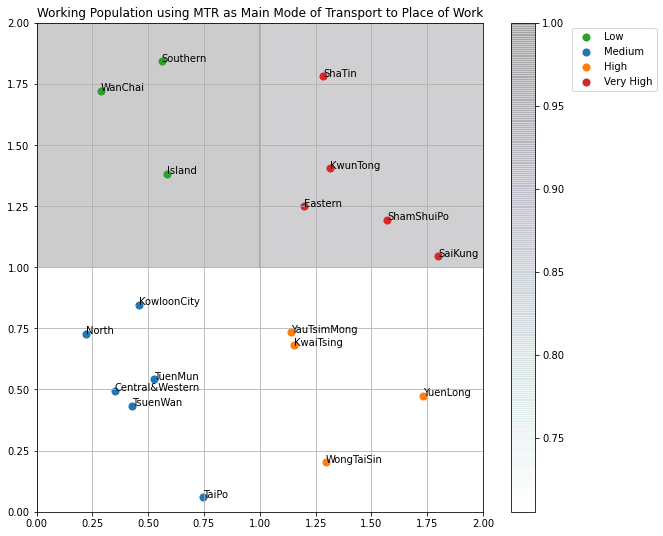

3
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.053903909315861157


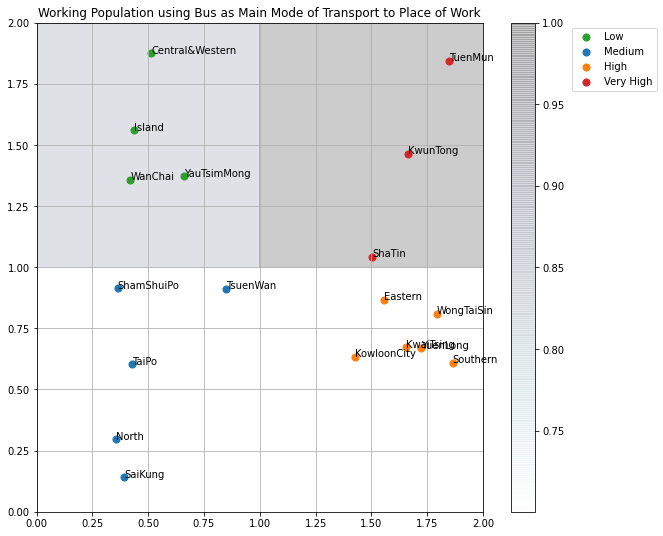

4
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.04914792460570647


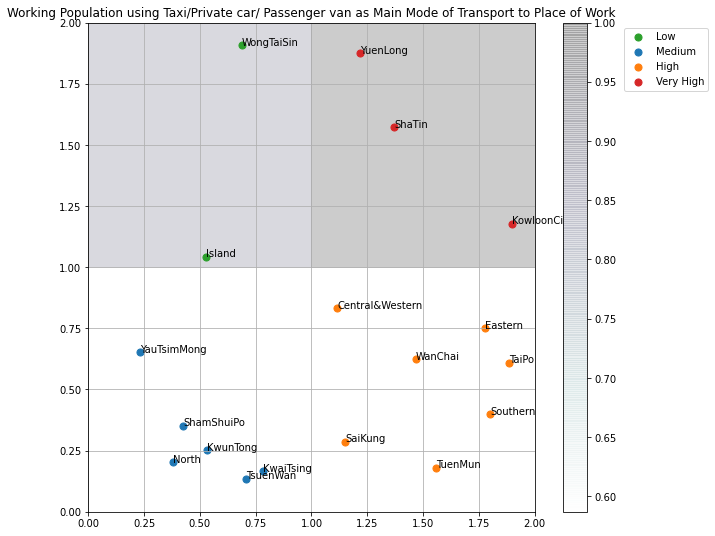

5
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.059676302882834924


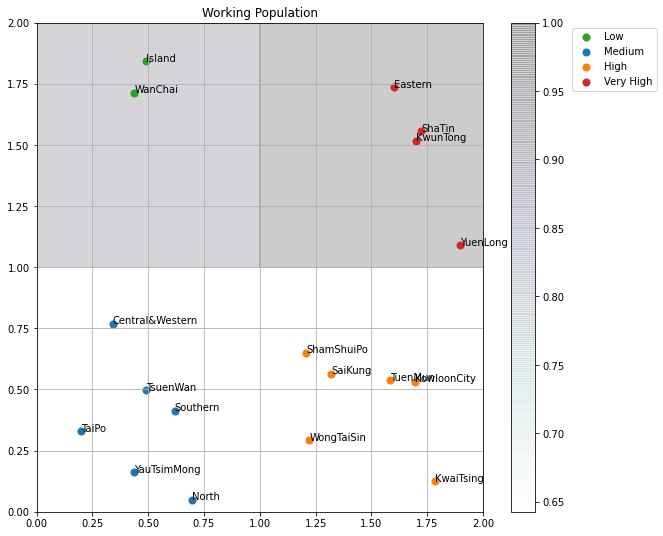

6
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05179310776510466


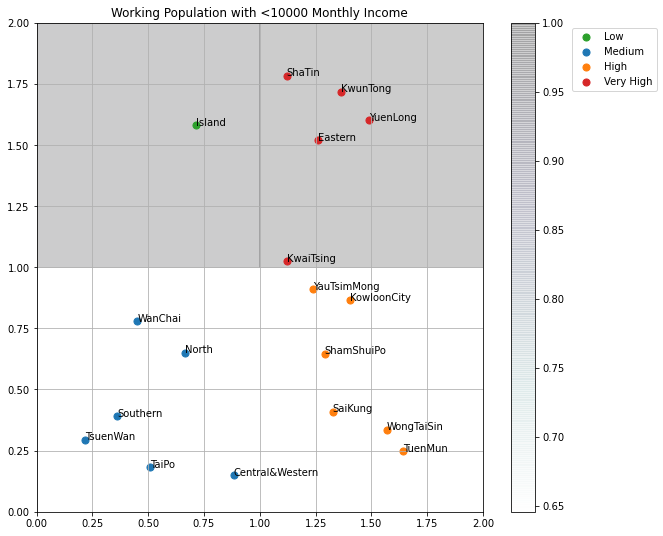

7
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.05526451608540591


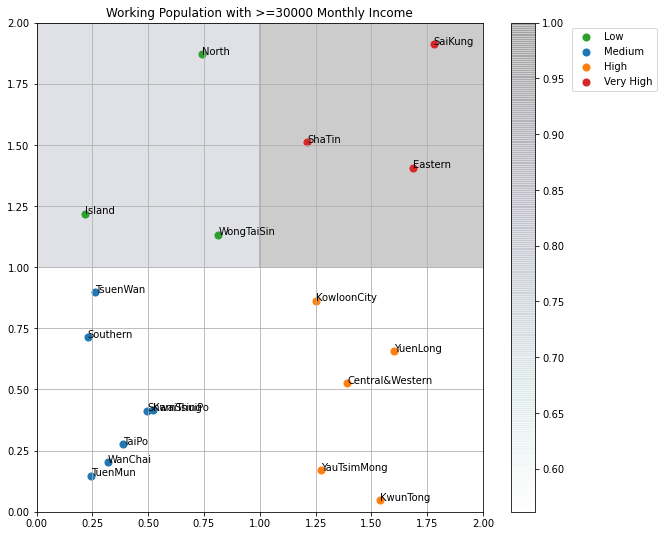

In [12]:
features_titles = df_features.columns
for idx, district in enumerate(df_features.columns):
  print(idx)
  df_cluster[features_titles[idx]] = plot_scatter(df_features[:-1].iloc[:,idx])

In [13]:
df_cluster['District'] = districts
df_cluster = df_cluster.set_index(['District'])
df_cluster

,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,First Half of 2nd Wave,Second Half of 2nd Wave,First Half of 3rd Wave,Second Half of 3rd Wave,First Half of 4th Wave,...,First Half of 5th Wave,Second Half of 5th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
District,,,,,,,,,,,,,,,,,,,,,
Central&Western,0,3,0,2,0,3,3,0,0,0,...,0,2,1,2,0,1,2,0,0,2
Eastern,3,2,0,2,3,2,0,0,0,0,...,2,3,3,2,3,2,2,3,3,3
Island,1,0,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
KowloonCity,0,0,2,2,3,0,0,2,2,2,...,2,3,2,3,0,2,3,2,2,2
KwaiTsing,0,1,2,0,0,1,1,0,2,0,...,0,0,3,2,2,2,0,2,3,0
KwunTong,2,0,3,2,2,0,0,3,2,2,...,2,2,3,3,3,3,0,3,3,2
North,1,1,0,1,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
SaiKung,0,0,0,0,0,0,0,2,0,0,...,0,2,2,1,3,0,2,2,2,3
ShamShuiPo,0,1,2,2,3,1,1,2,2,2,...,3,2,2,3,3,0,0,2,2,0


In [14]:
levels = ['Medium', 'Low', 'High', 'Very High']
df_cluster = df_cluster.applymap(lambda x: levels[x])
df_cluster

,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,First Half of 2nd Wave,Second Half of 2nd Wave,First Half of 3rd Wave,Second Half of 3rd Wave,First Half of 4th Wave,...,First Half of 5th Wave,Second Half of 5th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
District,,,,,,,,,,,,,,,,,,,,,
Central&Western,Medium,Very High,Medium,High,Medium,Very High,Very High,Medium,Medium,Medium,...,Medium,High,Low,High,Medium,Low,High,Medium,Medium,High
Eastern,Very High,High,Medium,High,Very High,High,Medium,Medium,Medium,Medium,...,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
Island,Low,Medium,Low,Low,Low,Low,Medium,Low,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
KowloonCity,Medium,Medium,High,High,Very High,Medium,Medium,High,High,High,...,High,Very High,High,Very High,Medium,High,Very High,High,High,High
KwaiTsing,Medium,Low,High,Medium,Medium,Low,Low,Medium,High,Medium,...,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
KwunTong,High,Medium,Very High,High,High,Medium,Medium,Very High,High,High,...,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
North,Low,Low,Medium,Low,Medium,Low,Low,Medium,Medium,Low,...,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
SaiKung,Medium,Medium,Medium,Medium,Medium,Medium,Medium,High,Medium,Medium,...,Medium,High,High,Low,Very High,Medium,High,High,High,Very High
ShamShuiPo,Medium,Low,High,High,Very High,Low,Low,High,High,High,...,Very High,High,High,Very High,Very High,Medium,Medium,High,High,Medium


In [15]:
df_cluster.to_excel("clusters_result.xlsx")

In [16]:
df_cluster = df_cluster.reset_index()

In [17]:
df_cluster

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,First Half of 2nd Wave,Second Half of 2nd Wave,First Half of 3rd Wave,Second Half of 3rd Wave,...,First Half of 5th Wave,Second Half of 5th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Medium,Very High,Medium,High,Medium,Very High,Very High,Medium,Medium,...,Medium,High,Low,High,Medium,Low,High,Medium,Medium,High
1,Eastern,Very High,High,Medium,High,Very High,High,Medium,Medium,Medium,...,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
2,Island,Low,Medium,Low,Low,Low,Low,Medium,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
3,KowloonCity,Medium,Medium,High,High,Very High,Medium,Medium,High,High,...,High,Very High,High,Very High,Medium,High,Very High,High,High,High
4,KwaiTsing,Medium,Low,High,Medium,Medium,Low,Low,Medium,High,...,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
5,KwunTong,High,Medium,Very High,High,High,Medium,Medium,Very High,High,...,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
6,North,Low,Low,Medium,Low,Medium,Low,Low,Medium,Medium,...,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
7,SaiKung,Medium,Medium,Medium,Medium,Medium,Medium,Medium,High,Medium,...,Medium,High,High,Low,Very High,Medium,High,High,High,Very High
8,ShamShuiPo,Medium,Low,High,High,Very High,Low,Low,High,High,...,Very High,High,High,Very High,Very High,Medium,Medium,High,High,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Medium,Medium,High,High,...,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High


# Analysis

In [18]:
df_cluster = pd.read_excel("/content/clusters_result.xlsx")
df_cluster

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,First Half of 2nd Wave,Second Half of 2nd Wave,First Half of 3rd Wave,Second Half of 3rd Wave,...,First Half of 5th Wave,Second Half of 5th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Medium,Very High,Medium,High,Medium,Very High,Very High,Medium,Medium,...,Medium,High,Low,High,Medium,Low,High,Medium,Medium,High
1,Eastern,Very High,High,Medium,High,Very High,High,Medium,Medium,Medium,...,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
2,Island,Low,Medium,Low,Low,Low,Low,Medium,Low,Low,...,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
3,KowloonCity,Medium,Medium,High,High,Very High,Medium,Medium,High,High,...,High,Very High,High,Very High,Medium,High,Very High,High,High,High
4,KwaiTsing,Medium,Low,High,Medium,Medium,Low,Low,Medium,High,...,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
5,KwunTong,High,Medium,Very High,High,High,Medium,Medium,Very High,High,...,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
6,North,Low,Low,Medium,Low,Medium,Low,Low,Medium,Medium,...,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
7,SaiKung,Medium,Medium,Medium,Medium,Medium,Medium,Medium,High,Medium,...,Medium,High,High,Low,Very High,Medium,High,High,High,Very High
8,ShamShuiPo,Medium,Low,High,High,Very High,Low,Low,High,High,...,Very High,High,High,Very High,Very High,Medium,Medium,High,High,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Medium,Medium,High,High,...,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High


## 5 Waves

In [19]:
df_cluster_5waves = pd.concat([df_cluster.iloc[:, 0:6].copy(), df_cluster.iloc[:, 14:].copy()], axis=1)
df_cluster_5waves

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Medium,Very High,Medium,High,Medium,Low,High,Medium,Low,High,Medium,Medium,High
1,Eastern,Very High,High,Medium,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
2,Island,Low,Medium,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
3,KowloonCity,Medium,Medium,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High
4,KwaiTsing,Medium,Low,High,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
6,North,Low,Low,Medium,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
7,SaiKung,Medium,Medium,Medium,Medium,Medium,High,Low,Very High,Medium,High,High,High,Very High
8,ShamShuiPo,Medium,Low,High,High,Very High,High,Very High,Very High,Medium,Medium,High,High,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High


In [20]:
level_order = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}
df_cluster_5waves.sort_values(by=['First Wave'], key=lambda x: -x.map(level_order))

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
1,Eastern,Very High,High,Medium,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
14,WanChai,High,Very High,Medium,Medium,Medium,Low,High,Low,Low,High,Low,Medium,Medium
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
0,Central&Western,Medium,Very High,Medium,High,Medium,Low,High,Medium,Low,High,Medium,Medium,High
15,WongTaiSin,Medium,Low,Very High,Medium,Medium,High,Very High,High,High,Low,High,High,Low
13,TuenMun,Medium,Medium,High,Medium,High,High,Medium,Medium,Very High,High,High,High,Medium
10,Southern,Medium,High,Low,Low,Low,Medium,Medium,Low,High,High,Medium,Medium,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
8,ShamShuiPo,Medium,Low,High,High,Very High,High,Very High,Very High,Medium,Medium,High,High,Medium
7,SaiKung,Medium,Medium,Medium,Medium,Medium,High,Low,Very High,Medium,High,High,High,Very High


Low in First Wave -> Low or Medium in population density

In [21]:
df_cluster_5waves.sort_values(by=['Second Wave'], key=lambda x: -x.map(level_order))

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Medium,Very High,Medium,High,Medium,Low,High,Medium,Low,High,Medium,Medium,High
14,WanChai,High,Very High,Medium,Medium,Medium,Low,High,Low,Low,High,Low,Medium,Medium
16,YauTsimMong,Medium,Very High,Very High,Very High,High,Medium,Very High,High,Low,Medium,Medium,High,High
1,Eastern,Very High,High,Medium,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
10,Southern,Medium,High,Low,Low,Low,Medium,Medium,Low,High,High,Medium,Medium,Medium
13,TuenMun,Medium,Medium,High,Medium,High,High,Medium,Medium,Very High,High,High,High,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
17,YuenLong,Low,Medium,High,Medium,Very High,Very High,Low,High,High,Very High,Very High,Very High,High
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
3,KowloonCity,Medium,Medium,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High


Second Wave:

High/Very High infection level -> mostly High/Very High working population with high income

In [22]:
df_cluster_5waves.sort_values(by=['Third Wave'], key=lambda x: -x.map(level_order))

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
15,WongTaiSin,Medium,Low,Very High,Medium,Medium,High,Very High,High,High,Low,High,High,Low
16,YauTsimMong,Medium,Very High,Very High,Very High,High,Medium,Very High,High,Low,Medium,Medium,High,High
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
8,ShamShuiPo,Medium,Low,High,High,Very High,High,Very High,Very High,Medium,Medium,High,High,Medium
13,TuenMun,Medium,Medium,High,Medium,High,High,Medium,Medium,Very High,High,High,High,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
17,YuenLong,Low,Medium,High,Medium,Very High,Very High,Low,High,High,Very High,Very High,Very High,High
4,KwaiTsing,Medium,Low,High,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
3,KowloonCity,Medium,Medium,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High
7,SaiKung,Medium,Medium,Medium,Medium,Medium,High,Low,Very High,Medium,High,High,High,Very High


Third Wave:

High/Very High in infection level -> High/Very High in working population and working population with low income, High/Very High in population with age 65+

In [23]:
df_cluster_5waves.sort_values(by=['Fourth Wave'], key=lambda x: -x.map(level_order))

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
16,YauTsimMong,Medium,Very High,Very High,Very High,High,Medium,Very High,High,Low,Medium,Medium,High,High
0,Central&Western,Medium,Very High,Medium,High,Medium,Low,High,Medium,Low,High,Medium,Medium,High
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
8,ShamShuiPo,Medium,Low,High,High,Very High,High,Very High,Very High,Medium,Medium,High,High,Medium
3,KowloonCity,Medium,Medium,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High
1,Eastern,Very High,High,Medium,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
7,SaiKung,Medium,Medium,Medium,Medium,Medium,High,Low,Very High,Medium,High,High,High,Very High
12,TsuenWan,Low,Low,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
13,TuenMun,Medium,Medium,High,Medium,High,High,Medium,Medium,Very High,High,High,High,Medium


In [24]:
df_cluster_5waves.sort_values(by=['Fifth Wave'], key=lambda x: -x.map(level_order))

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
8,ShamShuiPo,Medium,Low,High,High,Very High,High,Very High,Very High,Medium,Medium,High,High,Medium
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
3,KowloonCity,Medium,Medium,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High
17,YuenLong,Low,Medium,High,Medium,Very High,Very High,Low,High,High,Very High,Very High,Very High,High
1,Eastern,Very High,High,Medium,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
16,YauTsimMong,Medium,Very High,Very High,Very High,High,Medium,Very High,High,Low,Medium,Medium,High,High
13,TuenMun,Medium,Medium,High,Medium,High,High,Medium,Medium,Very High,High,High,High,Medium
4,KwaiTsing,Medium,Low,High,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
6,North,Low,Low,Medium,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low


For those districts that are classified as high or very high in terms of the number of COVID-19 cases, they are also classified as high or very high in terms of the number of low-income working population. Similarly, the working population in those districts are all classified as high or very high. The result indicates that MTR is the major transport to place of work in those districts.

In [25]:
df_cluster_5waves.sort_values(by=['Population density (number of persons per km^2)'], key=lambda x: -x.map(level_order))

,District,First Wave,Second Wave,Third Wave,Fourth Wave,Fifth Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
8,ShamShuiPo,Medium,Low,High,High,Very High,High,Very High,Very High,Medium,Medium,High,High,Medium
15,WongTaiSin,Medium,Low,Very High,Medium,Medium,High,Very High,High,High,Low,High,High,Low
3,KowloonCity,Medium,Medium,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High
16,YauTsimMong,Medium,Very High,Very High,Very High,High,Medium,Very High,High,Low,Medium,Medium,High,High
5,KwunTong,High,Medium,Very High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
14,WanChai,High,Very High,Medium,Medium,Medium,Low,High,Low,Low,High,Low,Medium,Medium
0,Central&Western,Medium,Very High,Medium,High,Medium,Low,High,Medium,Low,High,Medium,Medium,High
4,KwaiTsing,Medium,Low,High,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
1,Eastern,Very High,High,Medium,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
9,ShaTin,Medium,Medium,High,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High


High population density -> More High/Very High from Third Wave to Fifth Wave

## The 2nd to 5th waves divided into two halves

In [26]:
df_cluster_5waves_half = pd.concat([df_cluster.iloc[:, 0:1].copy(), df_cluster.iloc[:, 6:].copy()], axis=1)
df_cluster_5waves_half

,District,First Half of 2nd Wave,Second Half of 2nd Wave,First Half of 3rd Wave,Second Half of 3rd Wave,First Half of 4th Wave,Second Half of 4th Wave,First Half of 5th Wave,Second Half of 5th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Very High,Very High,Medium,Medium,Medium,Very High,Medium,High,Low,High,Medium,Low,High,Medium,Medium,High
1,Eastern,High,Medium,Medium,Medium,Medium,High,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
2,Island,Low,Medium,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
3,KowloonCity,Medium,Medium,High,High,High,High,High,Very High,High,Very High,Medium,High,Very High,High,High,High
4,KwaiTsing,Low,Low,Medium,High,Medium,Low,Medium,Medium,Very High,High,High,High,Medium,High,Very High,Medium
5,KwunTong,Medium,Medium,Very High,High,High,High,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
6,North,Low,Low,Medium,Medium,Low,Low,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
7,SaiKung,Medium,Medium,High,Medium,Medium,Medium,Medium,High,High,Low,Very High,Medium,High,High,High,Very High
8,ShamShuiPo,Low,Low,High,High,High,Medium,Very High,High,High,Very High,Very High,Medium,Medium,High,High,Medium
9,ShaTin,Medium,Medium,High,High,High,Low,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High


In [27]:
df_cluster_5waves_half['sort_val'] = df_cluster_5waves_half['First Half of 2nd Wave'].map(level_order) - df_cluster_5waves_half['Second Half of 2nd Wave'].map(level_order)
df_sorted = df_cluster_5waves_half.sort_values(by='sort_val')
tmp = pd.concat([df_sorted.iloc[:,:3], df_sorted.iloc[:,9:-1]], axis=1)
tmp

,District,First Half of 2nd Wave,Second Half of 2nd Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
17,YuenLong,Low,Medium,Very High,Low,High,High,Very High,Very High,Very High,High
2,Island,Low,Medium,Low,Low,Low,Low,Low,Low,Low,Low
15,WongTaiSin,Low,Low,High,Very High,High,High,Low,High,High,Low
12,TsuenWan,Low,Low,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
11,TaiPo,Low,Low,Medium,Low,Medium,Medium,High,Medium,Medium,Medium
10,Southern,Medium,Medium,Medium,Medium,Low,High,High,Medium,Medium,Medium
9,ShaTin,Medium,Medium,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
0,Central&Western,Very High,Very High,Low,High,Medium,Low,High,Medium,Medium,High
6,North,Low,Low,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
5,KwunTong,Medium,Medium,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High


From the first half of 2nd wave to the second half of the 2nd wave:

Infection level decreased -> relatively high population density (restrictive measures are effective to the districts with high population density)

In [28]:
df_cluster_5waves_half['sort_val'] = df_cluster_5waves_half['First Half of 3rd Wave'].map(level_order) - df_cluster_5waves_half['Second Half of 3rd Wave'].map(level_order)
df_sorted = df_cluster_5waves_half.sort_values(by='sort_val')
tmp = pd.concat([df_sorted.iloc[:,0:1],df_sorted.iloc[:,3:5], df_sorted.iloc[:,9:-1]], axis=1)
tmp

,District,First Half of 3rd Wave,Second Half of 3rd Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
17,YuenLong,Medium,High,Very High,Low,High,High,Very High,Very High,Very High,High
4,KwaiTsing,Medium,High,Very High,High,High,High,Medium,High,Very High,Medium
14,WanChai,Medium,Medium,Low,High,Low,Low,High,Low,Medium,Medium
13,TuenMun,High,High,High,Medium,Medium,Very High,High,High,High,Medium
12,TsuenWan,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
11,TaiPo,Low,Low,Medium,Low,Medium,Medium,High,Medium,Medium,Medium
10,Southern,Low,Low,Medium,Medium,Low,High,High,Medium,Medium,Medium
9,ShaTin,High,High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
0,Central&Western,Medium,Medium,Low,High,Medium,Low,High,Medium,Medium,High
6,North,Medium,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low


From the first half of 3rd wave to the second half of the 3rd wave:

Infection level Increased -> Very High in working population with low-income 

In [29]:
df_cluster_5waves_half['sort_val'] = df_cluster_5waves_half['First Half of 4th Wave'].map(level_order) - df_cluster_5waves_half['Second Half of 4th Wave'].map(level_order)
df_sorted = df_cluster_5waves_half.sort_values(by='sort_val')
tmp = pd.concat([df_sorted.iloc[:,0:1],df_sorted.iloc[:,5:7], df_sorted.iloc[:,9:-1]], axis=1)
tmp

,District,First Half of 4th Wave,Second Half of 4th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Medium,Very High,Low,High,Medium,Low,High,Medium,Medium,High
13,TuenMun,Low,Medium,High,Medium,Medium,Very High,High,High,High,Medium
12,TsuenWan,Low,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
17,YuenLong,Medium,High,Very High,Low,High,High,Very High,Very High,Very High,High
1,Eastern,Medium,High,Very High,High,Very High,High,High,Very High,Very High,Very High
5,KwunTong,High,High,Very High,Very High,Very High,Very High,Medium,Very High,Very High,High
6,North,Low,Low,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
7,SaiKung,Medium,Medium,High,Low,Very High,Medium,High,High,High,Very High
16,YauTsimMong,Very High,Very High,Medium,Very High,High,Low,Medium,Medium,High,High
10,Southern,Low,Low,Medium,Medium,Low,High,High,Medium,Medium,Medium


From the first half of 4th wave to the second half of the 4th wave:

Infection level decreased -> relatively high population density (restrictive measures are effective to the districts with high population density)

In [30]:
df_cluster_5waves_half['sort_val'] = df_cluster_5waves_half['First Half of 5th Wave'].map(level_order) - df_cluster_5waves_half['Second Half of 5th Wave'].map(level_order)
df_sorted = df_cluster_5waves_half.sort_values(by='sort_val')
tmp = pd.concat([df_sorted.iloc[:,0:1],df_sorted.iloc[:,7:9], df_sorted.iloc[:,9:-1]], axis=1)
tmp

,District,First Half of 5th Wave,Second Half of 5th Wave,Age 65+,Population density (number of persons per km^2),Working Population using MTR as Main Mode of Transport to Place of Work,Working Population using Bus as Main Mode of Transport to Place of Work,Working Population using Taxi/Private car/ Passenger van as Main Mode of Transport to Place of Work,Working Population,Working Population with <10000 Monthly Income,Working Population with >=30000 Monthly Income
0,Central&Western,Medium,High,Low,High,Medium,Low,High,Medium,Medium,High
1,Eastern,High,Very High,Very High,High,Very High,High,High,Very High,Very High,Very High
3,KowloonCity,High,Very High,High,Very High,Medium,High,Very High,High,High,High
13,TuenMun,Medium,High,High,Medium,Medium,Very High,High,High,High,Medium
6,North,Low,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low
7,SaiKung,Medium,High,High,Low,Very High,Medium,High,High,High,Very High
11,TaiPo,Low,Medium,Medium,Low,Medium,Medium,High,Medium,Medium,Medium
9,ShaTin,High,Very High,Very High,Medium,Very High,Very High,Very High,Very High,Very High,Very High
14,WanChai,Medium,Medium,Low,High,Low,Low,High,Low,Medium,Medium
12,TsuenWan,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium


From the first half of 5th wave to the second half of the 5th wave:

Infection level decreased -> relatively high population density (restrictive measures are effective to the districts with high population density)